# Animations

Create animations from tau_map6 simulation.

## Notebook Configuration

### Imports

In [2]:
# import packages
import os
import warnings
from os import PathLike
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from matplotlib import colormaps
from matplotlib.ticker import MaxNLocator
from matplotlib.animation import FuncAnimation

from rich import print
from tqdm import tqdm

In [ ]:
# import modules
from configurations import DEF_VAR_LIST, DEF_REM_COL_LIST, CSTYLE_FILE_STR
from grouped_bar_plot import grouped_bar_plot
from processing import load_mat_dir
from distributions import plot_clusters, create_protein_animation

: 

: 

: 

: 

### Directory Definitions

In [ ]:
# define the data directory
DATA_DIR = Path("data", "paper_100_true")

# configure the animation save directory
ANIMATION_DIR = Path("animations", DATA_DIR.parts[-1])
os.makedirs(ANIMATION_DIR, exist_ok=True)

# set plotting style
plt.style.use(["default", CSTYLE_FILE_STR])

# set the colormap
DEFAULT_COLORMAP = list(colormaps["tab10"].colors)

: 

: 

: 

: 

### Data Import

In [ ]:
# get the data dictionary from the data directory
data_dict = load_mat_dir(DATA_DIR, DEF_VAR_LIST, DEF_REM_COL_LIST)

: 

: 

: 

: 

### Add Calculations

In [ ]:
# add the final MT length to the sim_df
data_dict["sims"].keys()
length_vals = {}
for sim_name, sim_dict in data_dict["sims"].items():
    # extract the final length as the last entry in first col of mt_length
    length_vals[sim_name] = sim_dict["mt_length"][-1, 0]

# add the dictionary to the df
data_dict["df"]["final_length_units"] = data_dict["df"].index.map(length_vals)

# add final length column
data_dict["df"]["final_length"] = data_dict["df"]["final_length_units"]*data_dict["df"]["dx"]

: 

: 

: 

: 

In [ ]:
# create an averages df grouped by tm_ratio
data_avg_df = data_dict["df"].groupby("tm_ratio").mean()

: 

: 

: 

: 

## Define Functions

In [ ]:
# define a function to print the sim options
def print_options():
    # print the sim options
    print("Available simulations:\n", "\n ".join([f"{i} {sim_name}" for i, sim_name in enumerate(data_dict["sims"].keys())]))

: 

: 

: 

: 

## Plot Clusters

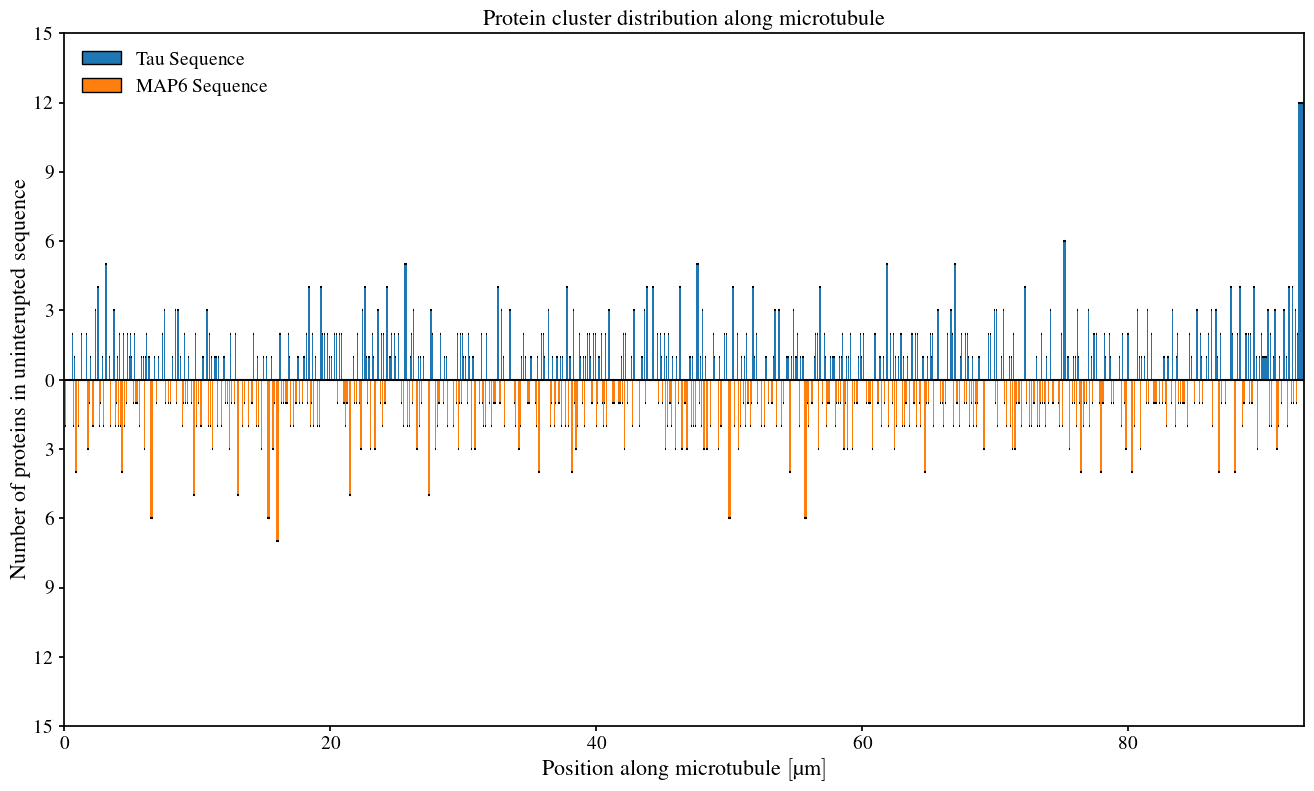

: 

: 

: 

: 

In [ ]:
# plot the protein cluster distribution using the function to test animations

# pick a sim name
sim_name = list(data_dict["sims"].keys())[0]

# draw the cluster plot
fig, ax = plt.subplots(figsize=(16, 9))

plot_clusters(
    fig, ax,
    sim_name,
    data_dict, -1,
    binding_ticks=False,
    protein_points_size=0)


## Animate Clusters

In [ ]:
print_options()

Available simulations:
 0 taumap6_1_true_3
 1 taumap6_1_true_2
 2 taumap6_1_true_1
 3 taumap6_10_true_3
 4 taumap6_10_true_2
 5 taumap6_10_true_1
 6 taumap6_5_true_1
 7 taumap6_5_true_3
 8 taumap6_5_true_2
 9 taumap6_50_true_2
 10 taumap6_50_true_3
 11 taumap6_50_true_1

: 

: 

: 

: 

In [ ]:
# define the name of the sim to animate
sim_name = list(data_dict["sims"].keys())[11]
print(f"Plotting '{sim_name}'.")

Plotting 'taumap6_50_true_1'.

: 

: 

: 

: 

### Generate a low resolution animation

In [ ]:
# define the desired runtime in seconds
anim_time = 10
frame_rate = 15

# generate animations for different parameters
# create_protein_animation(
#     save_path=ANIMATION_DIR / f"{sim_name}_animation_proteins.mp4",
#     sim_name=sim_name,
#     data_dict=data_dict,
#     frame_rate=frame_rate,
#     anim_time=anim_time,
#     overwrite=True,
#     protein_points_size=0,
#     binding_ticks=False)

Generating Animation: 'taumap6_1_true_3_animation_proteins.mp4': 100%|██████████| 150/150 [35:56<00:00, 14.38s/it]


: 

: 

: 

: 

### Generate a high resolution animation

Generating Animation: 'taumap6_50_true_1_animation_proteins_full.mp4':   6%|▋         | 631/10000 [10:27<2:35:22,  1.00it/s]


KeyboardInterrupt: 

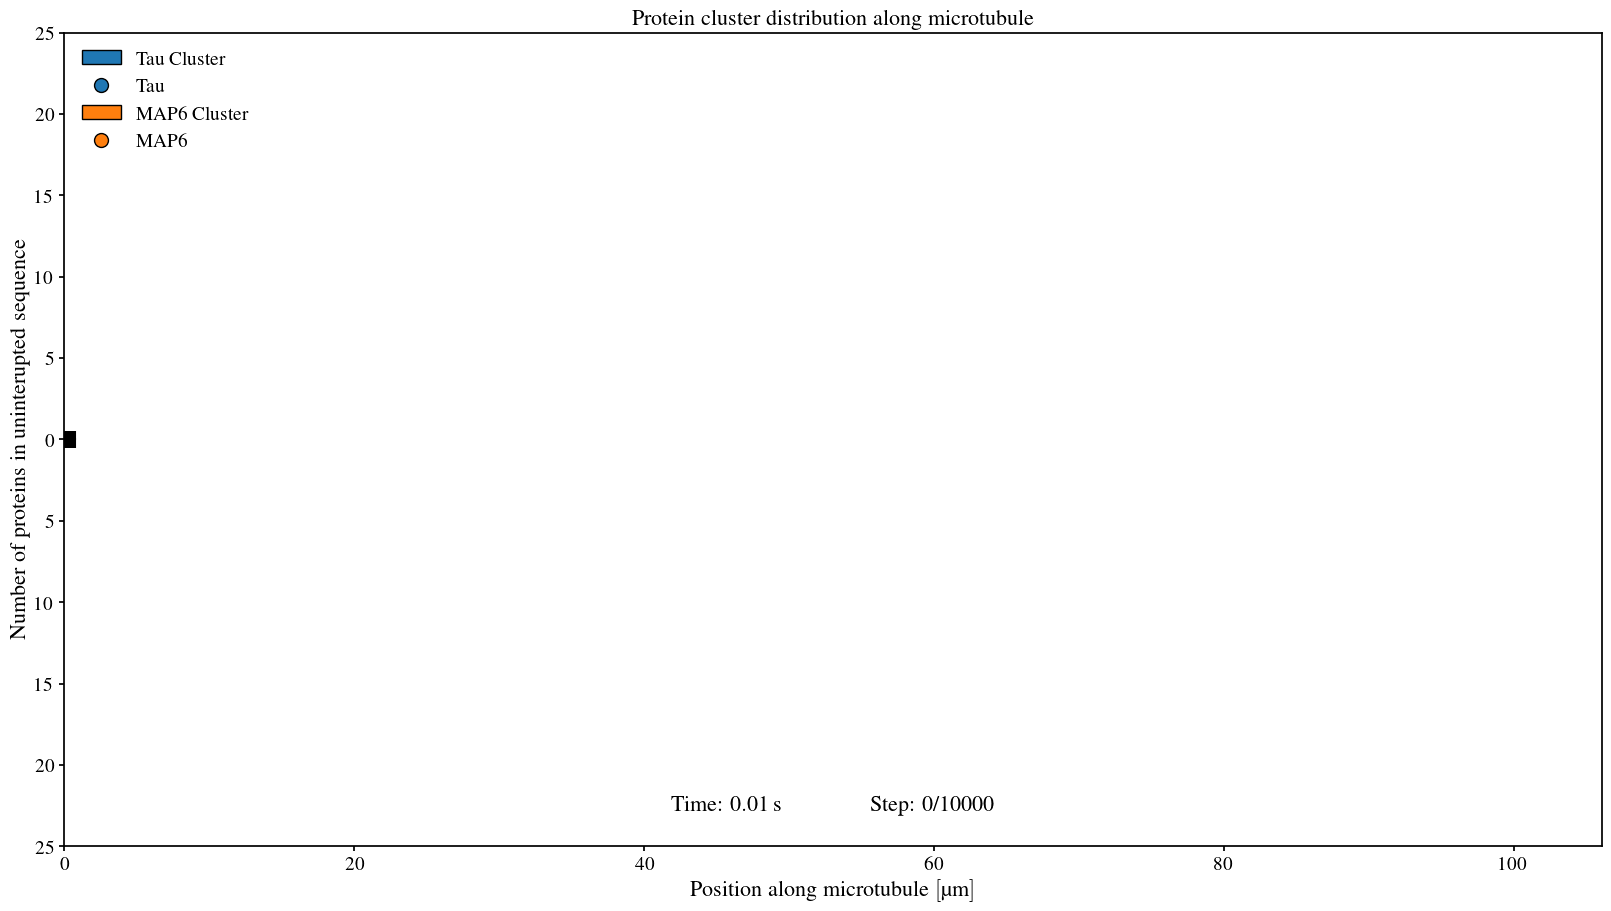

: 

: 

In [ ]:
# make a full res animation that shows each time step
# configure animation properties
frame_rate = 30
anim_time = 10
full_frame_rate = 50

# run this animation at 50 fps
# get the number of time steps
time_steps = data_dict["df"].loc[sim_name]["steps"]
full_anim_time = int(time_steps / full_frame_rate)
create_protein_animation(
    save_path=ANIMATION_DIR / f"{sim_name}_animation_proteins_full.mp4",
    sim_name=sim_name,
    data_dict=data_dict,
    frame_rate=full_frame_rate,
    anim_time=full_anim_time,
    overwrite=True,
    protein_points_size=30,
    binding_ticks=True)

## Bulk Animate

In [ ]:
# generate animations of all simulations
# configure animation properties
frame_rate = 30
anim_time = 10
full_frame_rate = 50

# # generate animations
for sim_name in data_dict["sims"].keys():
    # make a low res animation
    create_protein_animation(
        save_path=ANIMATION_DIR / f"{sim_name}_animation_proteins.mp4",
        sim_name=sim_name,
        data_dict=data_dict,
        frame_rate=frame_rate,
        anim_time=anim_time,
        overwrite=True,
        protein_points_size=30,
        binding_ticks=True)

    # make a full res animation that shows each time step
    # run this animation at 50 fps
    # get the number of time steps
    time_steps = data_dict["df"].loc[sim_name]["steps"]
    full_anim_time = int(time_steps / full_frame_rate)
    create_protein_animation(
        save_path=ANIMATION_DIR / f"{sim_name}_animation_proteins_full.mp4",
        sim_name=sim_name,
        data_dict=data_dict,
        frame_rate=full_frame_rate,
        anim_time=full_anim_time,
        overwrite=True,
        protein_points_size=30,
        binding_ticks=True)


: 